# Importing Necessary packages

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Dataset

In [45]:
df = pd.read_csv("survey_results_public_2023.csv")
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [46]:
# Getting the Columns in the dataset
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

### Cleaning Dataset

In [47]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly", "DevType", "RemoteWork"]]
df = df.rename({"ConvertedCompYearly" : "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,DevType,RemoteWork
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0,"Senior Executive (C-Suite, VP, etc.)",Remote
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0,"Developer, back-end","Hybrid (some remote, some in-person)"
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0,"Developer, front-end","Hybrid (some remote, some in-person)"
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0,"Developer, full-stack",Remote


In [48]:
# Removing the rows which have null values
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,DevType,RemoteWork
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9,"Employed, full-time",285000.0,"Senior Executive (C-Suite, VP, etc.)",Remote
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,"Employed, full-time",250000.0,"Developer, back-end","Hybrid (some remote, some in-person)"
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,"Employed, full-time",156000.0,"Developer, front-end","Hybrid (some remote, some in-person)"
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,"Employed, full-time;Independent contractor, fr...",23456.0,"Developer, full-stack",Remote
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0,"Developer, back-end",Remote


In [49]:
# info of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       48019 non-null  object 
 1   EdLevel       48019 non-null  object 
 2   YearsCodePro  47825 non-null  object 
 3   Employment    48007 non-null  object 
 4   Salary        48019 non-null  float64
 5   DevType       47904 non-null  object 
 6   RemoteWork    47940 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.9+ MB


In [50]:
# Removing all the NaN values in the DataFrame
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
DevType         0
RemoteWork      0
dtype: int64

In [51]:
# Info of the DataFrame after removing
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47723 entries, 1 to 89171
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       47723 non-null  object 
 1   EdLevel       47723 non-null  object 
 2   YearsCodePro  47723 non-null  object 
 3   Employment    47723 non-null  object 
 4   Salary        47723 non-null  float64
 5   DevType       47723 non-null  object 
 6   RemoteWork    47723 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.9+ MB


In [52]:
df = df[df["Employment"]=="Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39136 entries, 1 to 89171
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       39136 non-null  object 
 1   EdLevel       39136 non-null  object 
 2   YearsCodePro  39136 non-null  object 
 3   Salary        39136 non-null  float64
 4   DevType       39136 non-null  object 
 5   RemoteWork    39136 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.1+ MB


In [53]:
df['Country'].value_counts()

Country
United States of America                                10567
Germany                                                  3200
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
                                                        ...  
Botswana                                                    1
Sierra Leone                                                1
Guyana                                                      1
Guinea-Bissau                                               1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

In [54]:
""" There are so many countries annd few countries with single value so we are grouping them """
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i]>=cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [55]:
country_map = shorten_categories(df.Country.value_counts(), 300)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                10567
Other                                                    6522
Germany                                                  3200
United Kingdom of Great Britain and Northern Ireland     3072
Canada                                                   1807
India                                                    1600
France                                                   1453
Netherlands                                              1001
Australia                                                 985
Brazil                                                    972
Spain                                                     965
Sweden                                                    881
Italy                                                     826
Poland                                                    740
Switzerland                                               510
Denmark                                                   440


In [56]:
df.Country.unique()

array(['United States of America',
       'United Kingdom of Great Britain and Northern Ireland', 'Finland',
       'Australia', 'Netherlands', 'Germany', 'Sweden', 'France', 'Other',
       'Spain', 'Brazil', 'Portugal', 'Italy', 'Canada', 'Switzerland',
       'India', 'Russian Federation', 'Austria', 'Norway', 'Turkey',
       'Belgium', 'Denmark', 'Israel', 'Ukraine', 'Poland', 'New Zealand'],
      dtype=object)

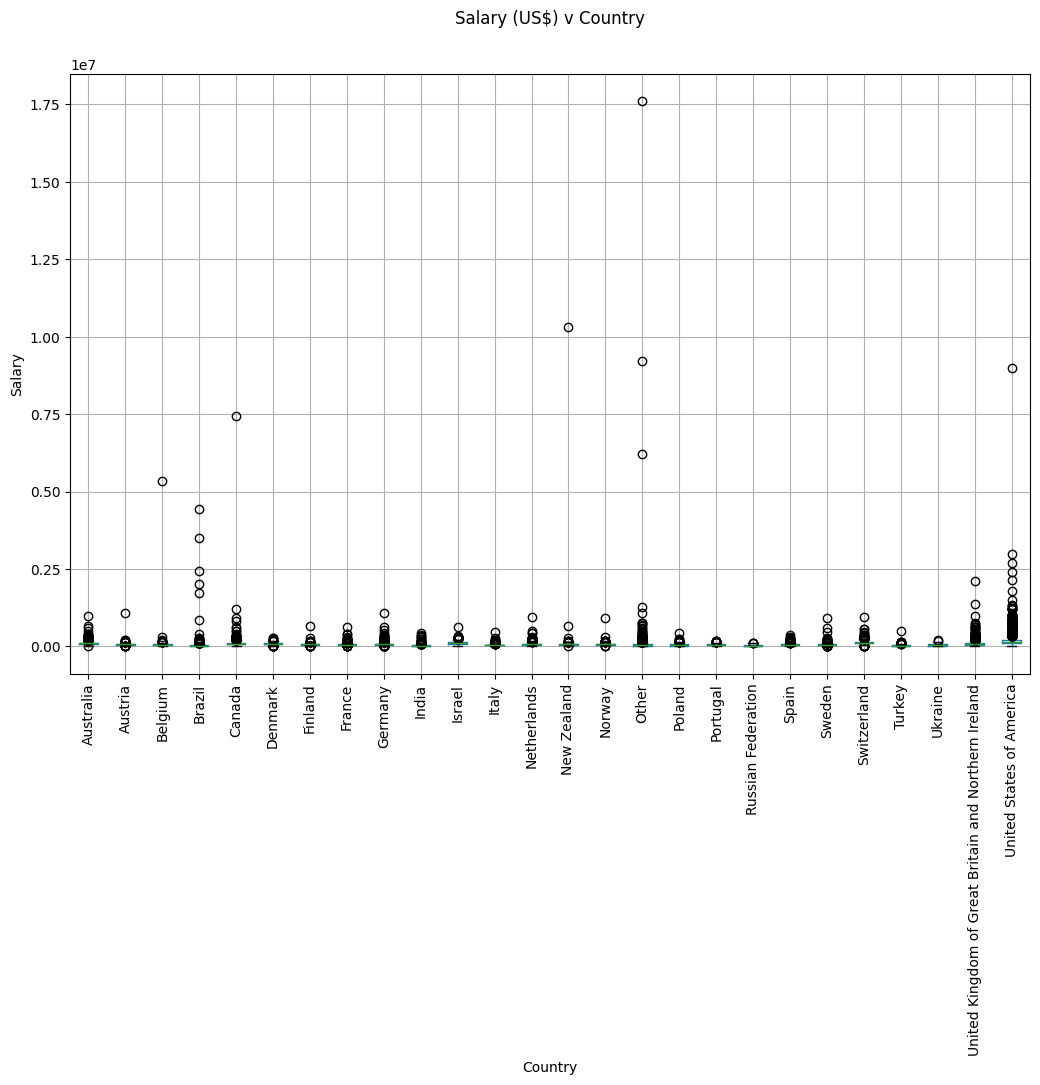

In [57]:
# BoxPlot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df.boxplot('Salary', 'Country', ax= ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [58]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

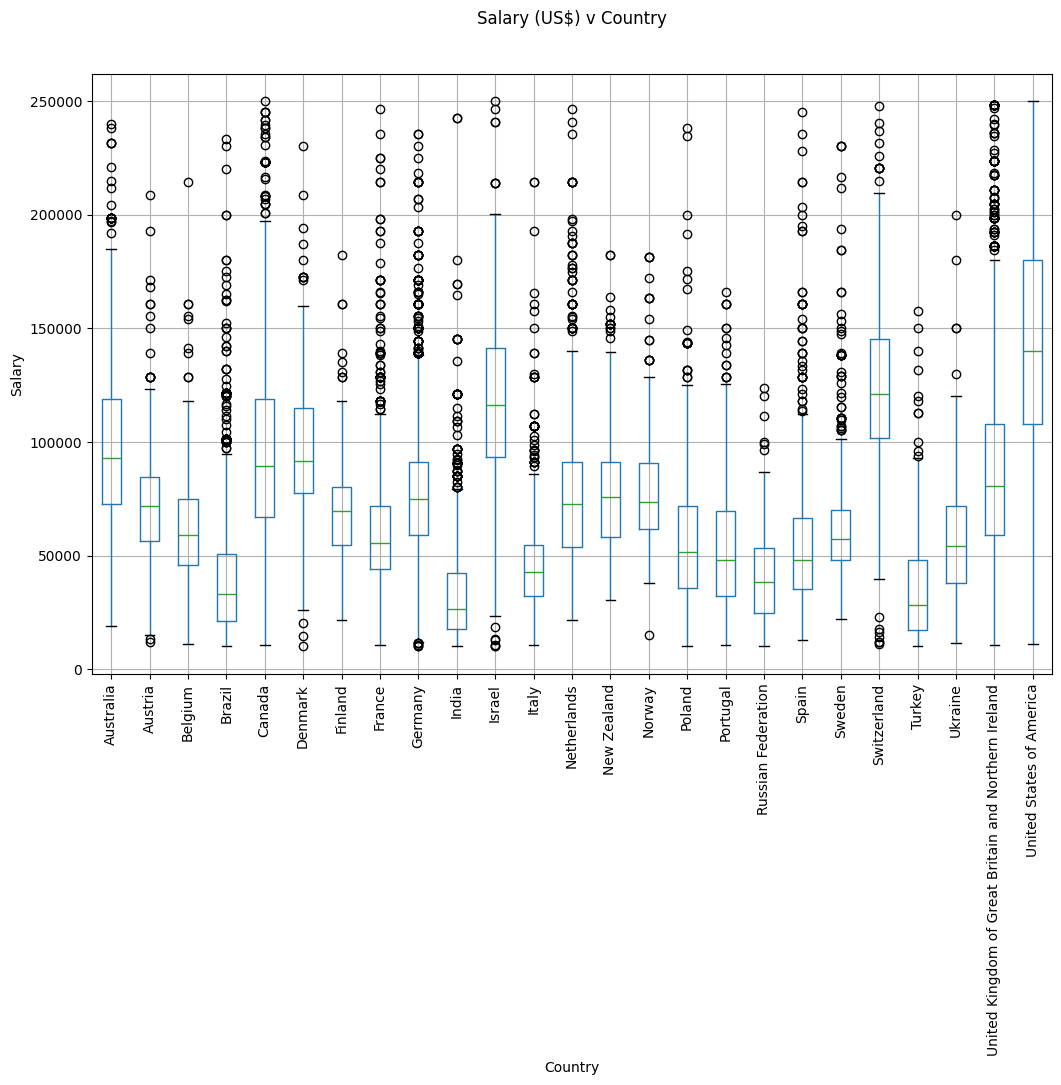

In [59]:
# BoxPlot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df.boxplot('Salary', 'Country', ax= ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [60]:
df["YearsCodePro"].unique()

array(['23', '7', '21', '3', '15', '9', 'Less than 1 year', '10', '2',
       '6', '14', '5', '19', '13', '16', '28', '24', '25', '12', '4',
       '20', '8', '18', '30', '27', '17', '43', '38', '33', '29', '22',
       '1', '11', '34', '42', '26', '31', '36', '39', '40', '32', '44',
       '37', '35', '48', 'More than 50 years', '45', '41', '50', '46',
       '49', '47'], dtype=object)

In [61]:
""" There are only two strings in the YearsCodePro so we are converting  it into float type"""

def  clean_experience(x):
    if x== 'More than 50 years':
        return 50
    if x== 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [62]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [63]:
df["DevType"].value_counts()

DevType
Developer, full-stack                            10587
Developer, back-end                               6035
Developer, front-end                              1906
Developer, desktop or enterprise applications     1590
Developer, embedded applications or devices        954
Other (please specify):                            952
Engineering manager                                897
Developer, mobile                                  888
Data scientist or machine learning specialist      662
DevOps specialist                                  654
Engineer, data                                     639
Research & Development role                        576
Cloud infrastructure engineer                      530
Academic researcher                                454
Senior Executive (C-Suite, VP, etc.)               397
Data or business analyst                           301
Developer, game or graphics                        290
Developer, QA or test                              229
Sy

In [64]:
"""As there are few DevType with less than 100 count we are grouping them"""
devtype_map = shorten_categories(df.DevType.value_counts(), 100)
df['DevType'] = df['DevType'].map(devtype_map)
df.DevType.value_counts()

DevType
Developer, full-stack                            10587
Developer, back-end                               6035
Developer, front-end                              1906
Developer, desktop or enterprise applications     1590
Developer, embedded applications or devices        954
Other (please specify):                            952
Engineering manager                                897
Developer, mobile                                  888
Data scientist or machine learning specialist      662
DevOps specialist                                  654
Engineer, data                                     639
Research & Development role                        576
Cloud infrastructure engineer                      530
Academic researcher                                454
Other                                              401
Senior Executive (C-Suite, VP, etc.)               397
Data or business analyst                           301
Developer, game or graphics                        290
De

In [65]:
df.DevType.unique()

array(['Developer, back-end', 'Developer, front-end',
       'Developer, full-stack', 'System administrator',
       'Developer, QA or test',
       'Data scientist or machine learning specialist',
       'Data or business analyst', 'Security professional',
       'Research & Development role',
       'Developer, desktop or enterprise applications', 'Engineer, data',
       'Product manager', 'Other',
       'Developer, embedded applications or devices',
       'Developer Experience', 'Other (please specify):',
       'Cloud infrastructure engineer', 'Developer, mobile',
       'DevOps specialist', 'Engineering manager',
       'Senior Executive (C-Suite, VP, etc.)',
       'Engineer, site reliability', 'Project manager',
       'Academic researcher', 'Developer, game or graphics',
       'Hardware Engineer', 'Scientist'], dtype=object)

In [66]:
df["RemoteWork"].unique()

array(['Hybrid (some remote, some in-person)', 'Remote', 'In-person'],
      dtype=object)

In [67]:
"""since the YearsCodePro is in int and to convert labels of Country, Education,
    DevType, RemoteWork we'll use labelencoder to convert string values to array of ints"""
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()

array([1, 6, 2, 4, 0, 5, 3, 7])

In [68]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([24, 23,  6,  0, 12,  8, 19,  7, 18,  3, 16, 11,  4, 20,  9,  1, 14,
       17,  2,  5, 21, 10, 22, 15, 13])

In [69]:
le_devtype = LabelEncoder()
df['DevType'] = le_devtype.fit_transform(df['DevType'])
df["DevType"].unique()

array([ 7, 10, 11, 26,  6,  3,  2, 24, 22,  8, 14, 20, 18,  9,  5, 19,  1,
       13,  4, 16, 25, 15, 21,  0, 12, 17, 23])

In [70]:
le_work = LabelEncoder()
df['RemoteWork'] = le_work.fit_transform(df['RemoteWork'])
df["RemoteWork"].unique()

array([0, 2, 1])

### Selecting Features and Labels(Salary) values

In [71]:
X = df.drop("Salary", axis=1)          
y = df["Salary"]

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Model Building

### Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_scaled, y.values)

LinearRegression()

In [74]:
y_pred = linear_reg.predict(X_scaled)

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))

In [76]:
print("${:,.02f}".format(error))

$45,392.46


### Decision Tree Regressor

In [77]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_scaled, y.values)

DecisionTreeRegressor(random_state=0)

In [78]:
y_pred = dec_tree_reg.predict(X_scaled)

In [79]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$22,456.25


### RandomForest

In [80]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_scaled, y.values)

RandomForestRegressor(random_state=0)

In [81]:
y_pred = random_forest_reg.predict(X_scaled)

In [82]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$24,011.21


### Results 

    Based on the errors provided for each regression model:
        1. Linear Regression: $45,392.46
        2. Decision Tree Regression: $22,456.25
        3. Random Forest: $24,011.21
    
    Decision Tree Regression and Random Forest outperform Linear Regression in terms of prediction accuracy.

    Decision Tree Regression has the lowest error, indicating it may be the most suitable model for this dataset.
    
    Random Forest also performs well, with slightly higher error than Decision Tree Regression but still lower than Linear Regression.
    
    Linear Regression has the highest error among the three models, suggesting it may not capture the underlying patterns in the data as effectively as tree-based models.

    In summary, for this particular dataset, Decision Tree Regression and Random Forest appear to be better choices for predictive modeling compared to Linear Regression

### GridSearch CV Model

In [83]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [84]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$33,472.91


In [85]:
X

,Country,EdLevel,YearsCodePro,DevType,RemoteWork
2,24,1,23.0,7,0
3,24,1,7.0,10,0
5,23,6,21.0,7,2
6,24,6,3.0,11,2
7,24,1,3.0,11,2
...,...,...,...,...,...
89156,24,1,8.0,16,2
89158,19,1,8.0,10,0
89162,3,2,24.0,7,2
89167,9,1,2.0,13,2


In [86]:
# country, edlevel, yearscodepro, devtype, remotework
X = np.array([["United States of America", 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 15, 'Developer, back-end', 'Remote' ]])
X

array([['United States of America',
        'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', '15',
        'Developer, back-end', 'Remote']], dtype='<U47')

In [87]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X[:, 3] = le_devtype.transform(X[:,3])
X[:, 4] = le_work.transform(X[:,4])
# print(X[:, 3] = le_devtype.transform(X[:,0]))
X = X.astype(int)
X

array([[24,  2, 15,  7,  2]])

In [88]:
y_pred = dec_tree_reg.predict(X)
y_pred

array([200000.])

In [89]:
# Creating pickled file
import pickle

In [92]:
# Dumping the pickle file
data = {"model": dec_tree_reg, "le_country": le_country, "le_education": le_education, "le_devtype": le_devtype, "le_work": le_work}
with open('model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [93]:
# Open pickled file and check
with open('model.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]
le_devtype = data["le_devtype"]
le_work = data["le_work"]

In [94]:
# Checking the pickled file
y_pred = dec_tree_reg.predict(X)
y_pred

array([200000.])